In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## ExcelからDataを読み込む

/Users/tobiuo/learning/machine-learning/venv/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


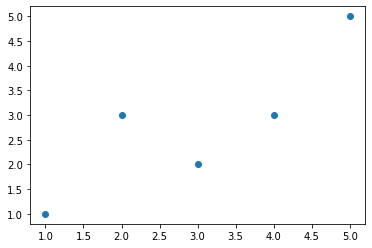

In [2]:
# Excel内の画像などは読み込めないというwarningが出るが, dataは読み込めているため無視する. 
data = pd.read_excel("02-SimpleLinearRegression.xlsx", usecols=[0,1], header=3)[:5].astype(np.float64)
plt.scatter(data.x, data.y)

## 傾きを求める
$ slope = \frac{\Sigma^n_{i=1} (x_{i} - mean(x)) \times (y_{i} - mean(y))} {\Sigma^n_{i=1} (x_{i} - mean(x))^2}$

In [3]:
mean_x = np.mean(data.x)
mean_y = np.mean(data.y)
slope = np.sum((data.x - mean_x) * (data.y - mean_y)) / np.sum((data.x - mean_x)**2)
slope

0.8

## 切片を求める
$intercept = mean(y) - slope \times mean(x)$

In [4]:
# 計算誤差はnp.round()で誤魔化しています. 
intercept = np.round(mean_y - slope * mean_x, decimals=1)
intercept

0.4

## 予測した関数を出力してみる
$predict = intercept + slope \times x$

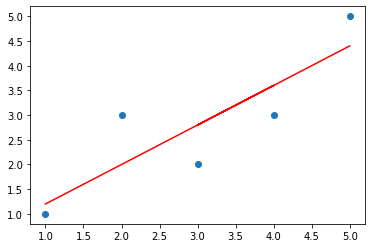

In [5]:
predict = intercept + slope * data.x
plt.scatter(data.x, data.y)
plt.plot(data.x, predict, color='red')

## 誤差を評価
$RMSE = \sqrt{\frac{\Sigma^n_{i=1}(p_{i} - y_{i})^2}{n}}$

In [6]:
rmse = np.sqrt(np.sum((predict - data.y)**2) / len(data))
rmse

0.6928203230275509

## 相関係数と標準偏差を用いて傾きを求める
$slope = corr(x, y) \times \frac{stdev(y)}{stdev(x)}$

In [7]:
slope = np.corrcoef(data.x, data.y)[0][1] * (np.std(data.y) / np.std(data.x))
slope

0.8